# Health&Life Analytics – Projeto Completo 

Este notebook visa atender integralmente às entregas obrigatórias:

- **Entrega #1 – EDA**: análise exploratória com gráficos para variáveis numéricas e categóricas, comentários e insights.
- **Entrega #2 – Visualização e Insights**: gráficos comparativos (dispersão, boxplots, heatmap), segmentação por grupos e seção de **Principais Descobertas**.
- **Entrega #3 – Modelo Preditivo**: pré-processamento (remoção de colunas irrelevantes, encoding categóricas, criação de features), split treino/teste, dois modelos (LogReg, RandomForest), avaliação completa, salvamento do dataset processado e do melhor modelo, e **Recomendações para o Negócio**.

## 1. Importações e Configuração de Estilo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import joblib

plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11


## 2. Carregamento do Dataset

In [2]:
df = pd.read_csv('synthetic_coffee_health_10000(in).csv')
df.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## 3. EDA – Visão Geral

In [3]:
print("Dimensões:", df.shape)

print("\nTipos de dados:")
print(df.dtypes)

print("\nValores nulos por coluna:")
print(df.isna().sum())

print("\nDuplicados:", df.duplicated().sum())

# Estatísticas descritivas (numéricas)
desc_num = df.describe().T
display(desc_num)

# Estatísticas descritivas (categóricas)
desc_cat = df.describe(include="object").T
display(desc_cat)


Dimensões: (10000, 16)

Tipos de dados:
ID                           int64
Age                          int64
Gender                      object
Country                     object
Coffee_Intake              float64
Caffeine_mg                float64
Sleep_Hours                float64
Sleep_Quality               object
BMI                        float64
Heart_Rate                   int64
Stress_Level                object
Physical_Activity_Hours    float64
Health_Issues               object
Occupation                  object
Smoking                      int64
Alcohol_Consumption          int64
dtype: object

Valores nulos por coluna:
ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physica

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.250,10000.0
Age,10000.0,34.94910,11.160939,18.0,26.00,34.0,43.000,80.0
Coffee_Intake,10000.0,2.50923,1.450248,0.0,1.50,2.5,3.500,8.2
Caffeine_mg,10000.0,238.41101,137.748815,0.0,138.75,235.4,332.025,780.3
Sleep_Hours,10000.0,6.63622,1.222055,3.0,5.80,6.6,7.500,10.0
BMI,10000.0,23.98686,3.906411,15.0,21.30,24.0,26.600,38.2
Heart_Rate,10000.0,70.61780,9.822951,50.0,64.00,71.0,77.000,109.0
Physical_Activity_Hours,10000.0,7.48704,4.315180,0.0,3.70,7.5,11.200,15.0
Smoking,10000.0,0.20040,0.400320,0.0,0.00,0.0,0.000,1.0
Alcohol_Consumption,10000.0,0.30070,0.458585,0.0,0.00,0.0,1.000,1.0


,count,unique,top,freq
Gender,10000,3,Female,5001
Country,10000,20,Canada,543
Sleep_Quality,10000,4,Good,5637
Stress_Level,10000,3,Low,6989
Health_Issues,4059,3,Mild,3579
Occupation,10000,5,Office,2073


In [ ]:
# Estatísticas descritivas (categóricas)
df.describe(include='object').T


### 3.1 Gráficos para Variáveis Numéricas (Histogramas e Boxplots)

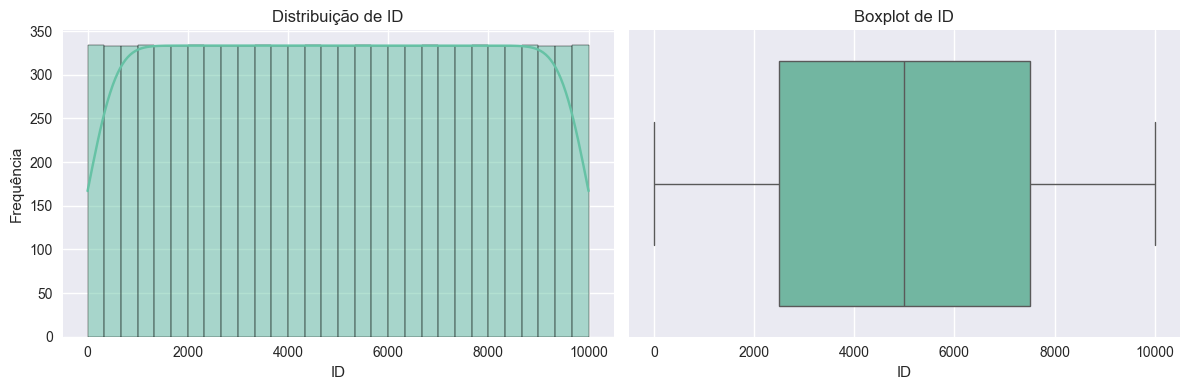

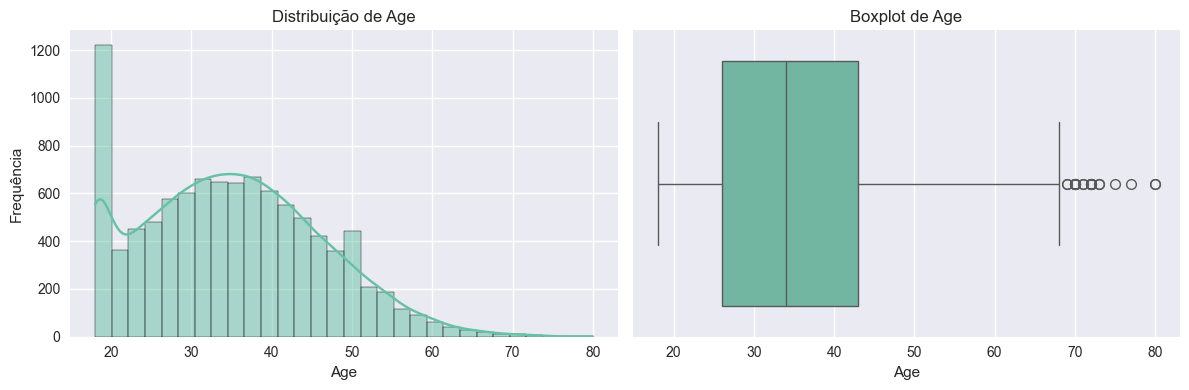

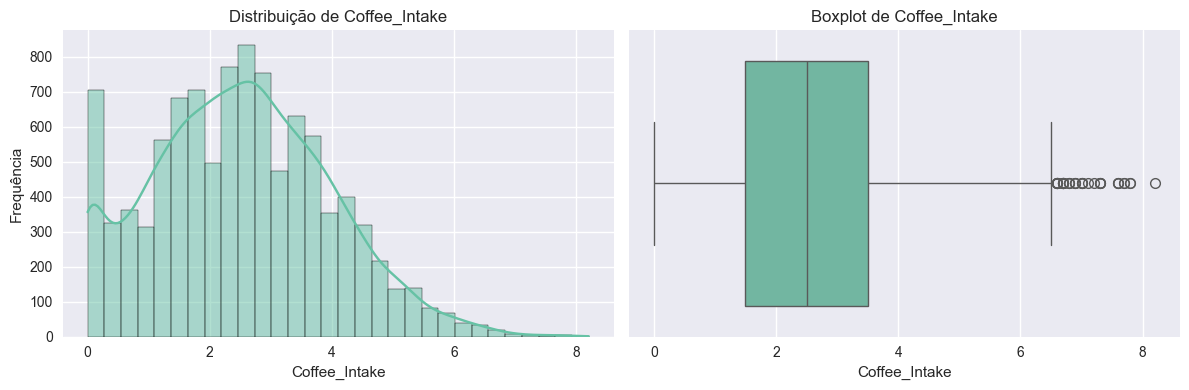

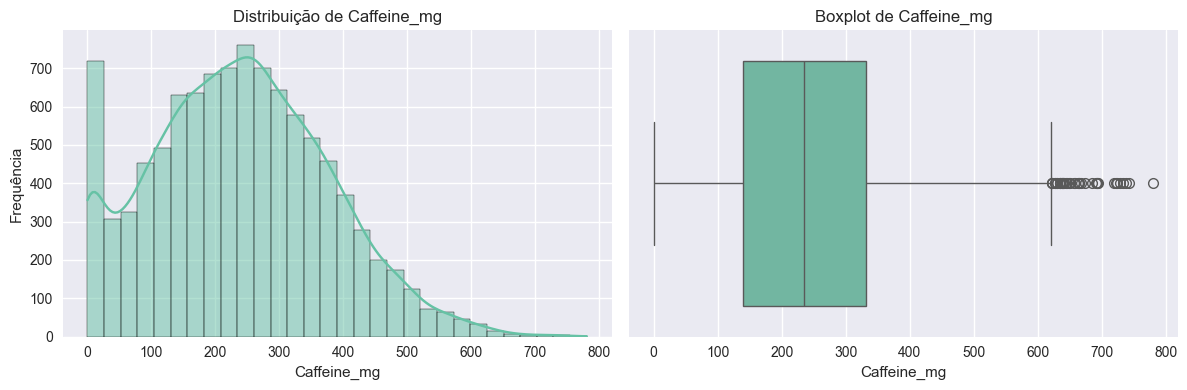

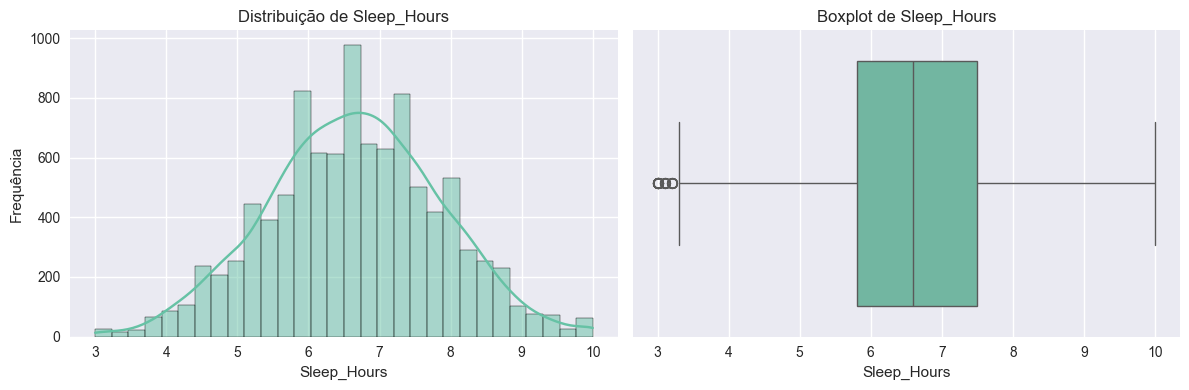

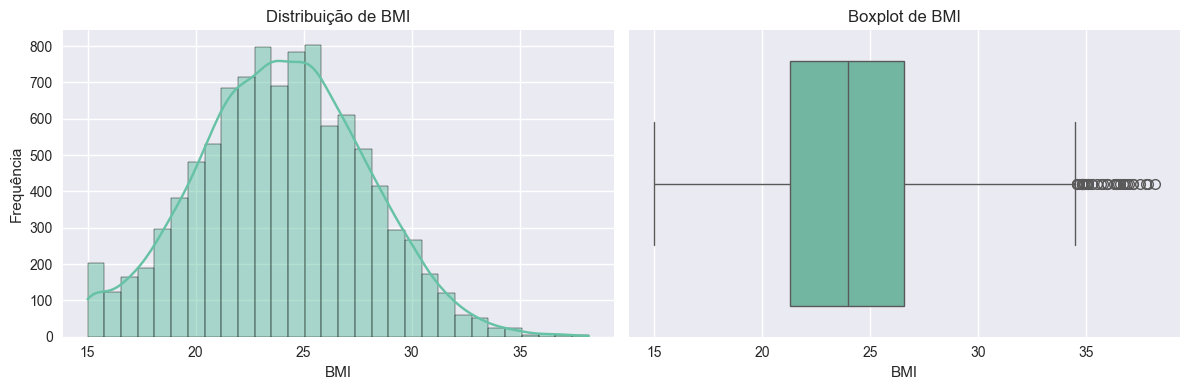

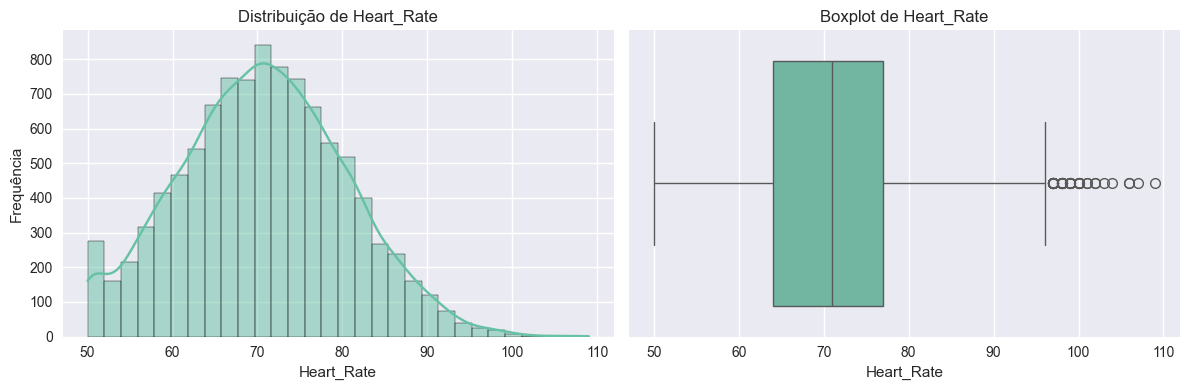

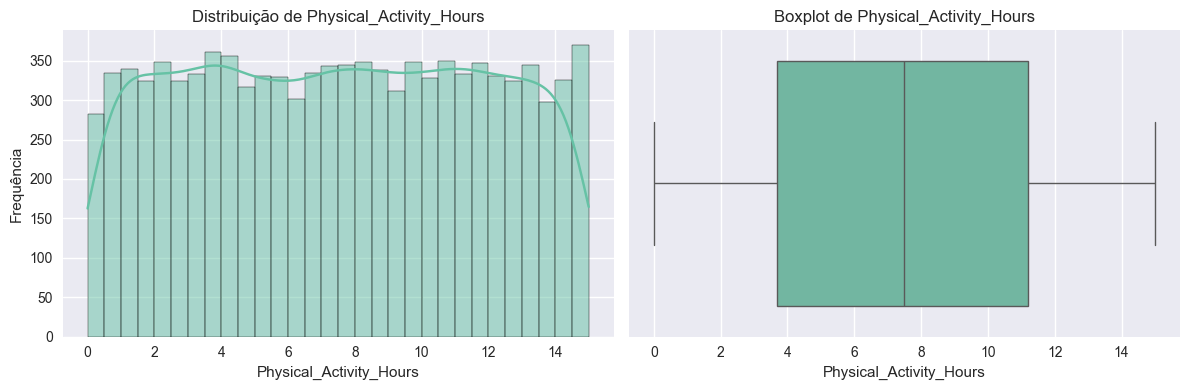

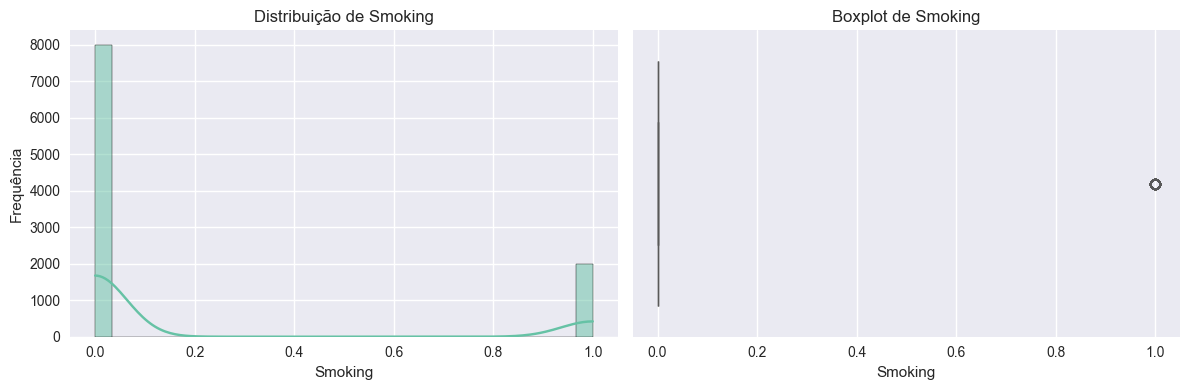

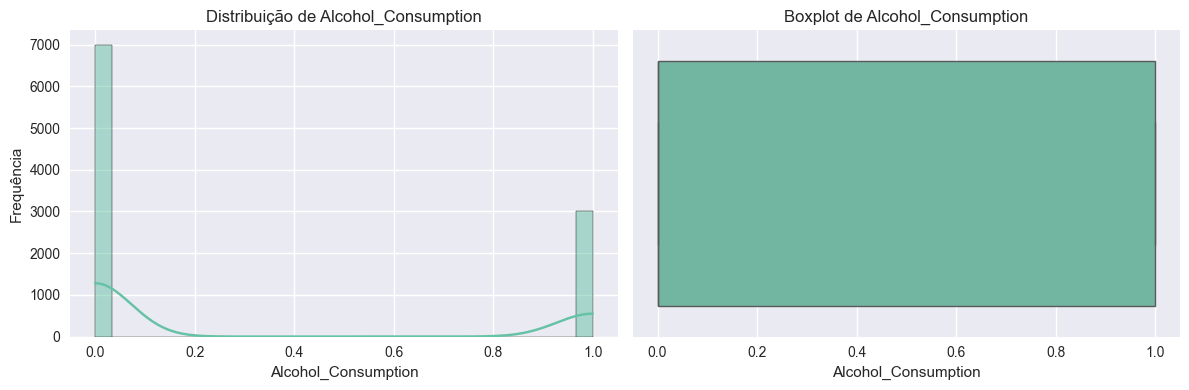

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.histplot(df[col], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Distribuição de {col}')
    ax[0].set_xlabel(col); ax[0].set_ylabel('Frequência')
    sns.boxplot(x=df[col], ax=ax[1])
    ax[1].set_title(f'Boxplot de {col}')
    ax[1].set_xlabel(col)
    plt.tight_layout()
    plt.show()


### 3.2 Gráficos para Variáveis Categóricas (Barras e Pizzas)

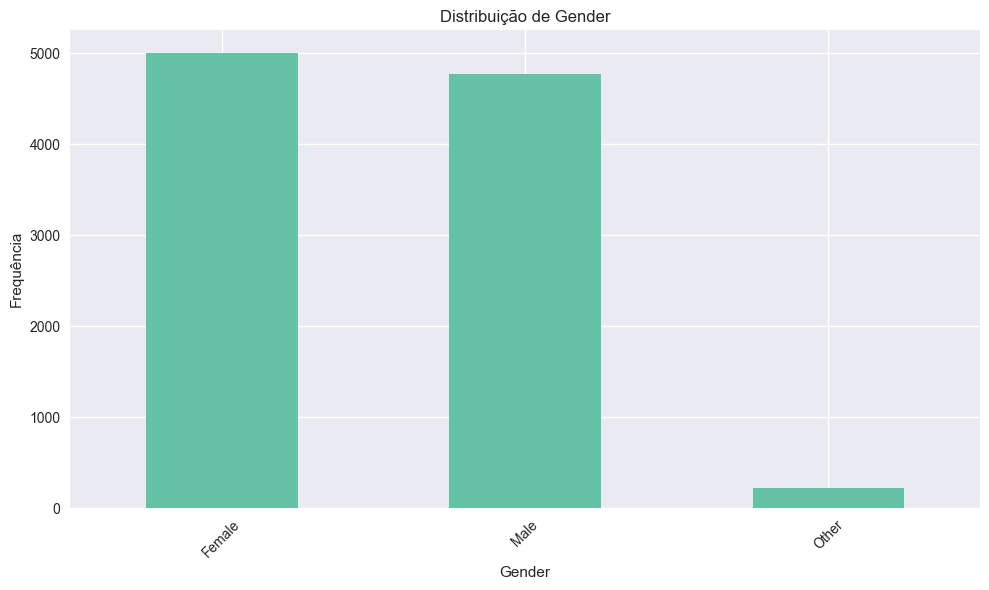

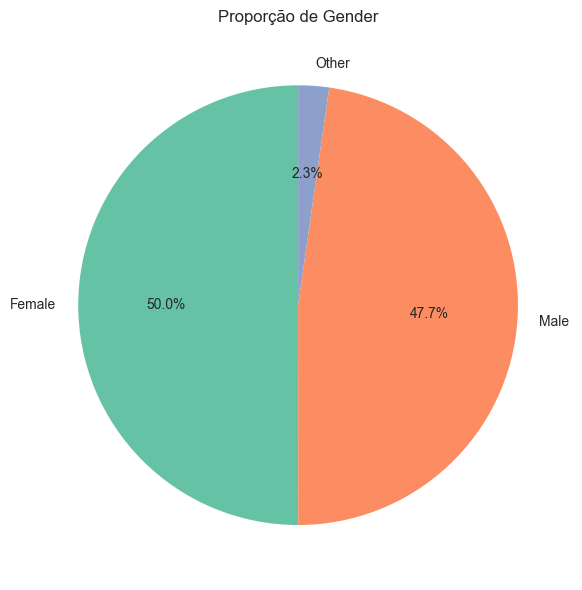

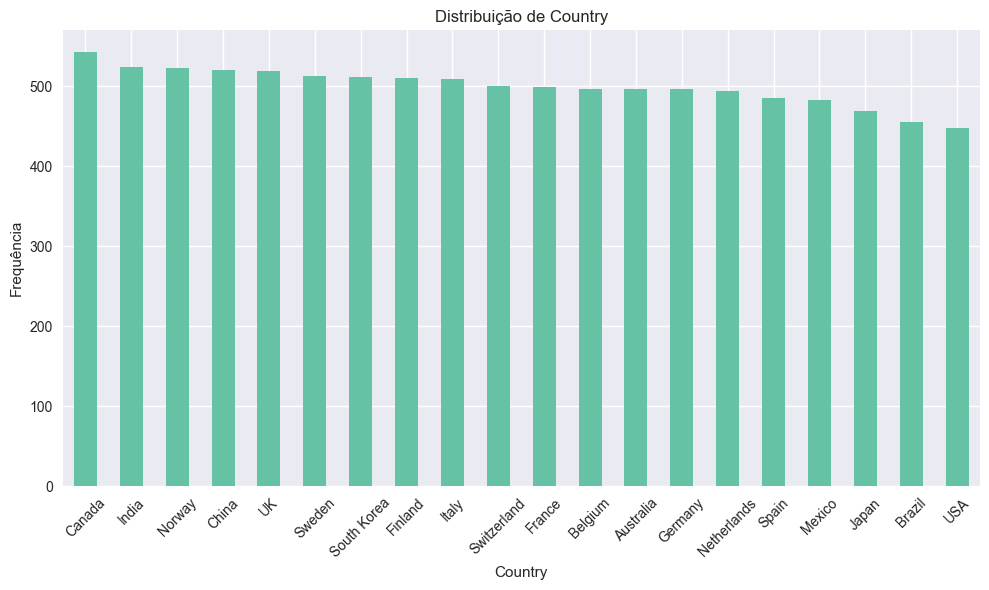

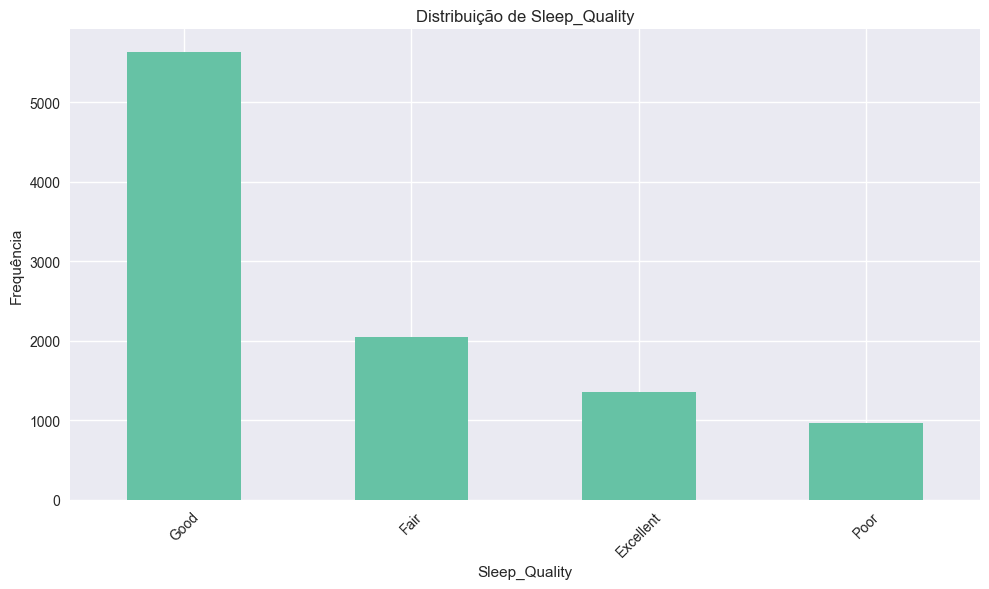

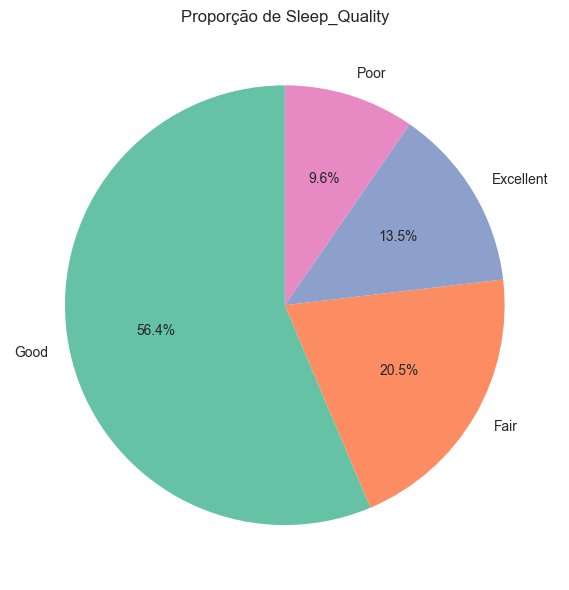

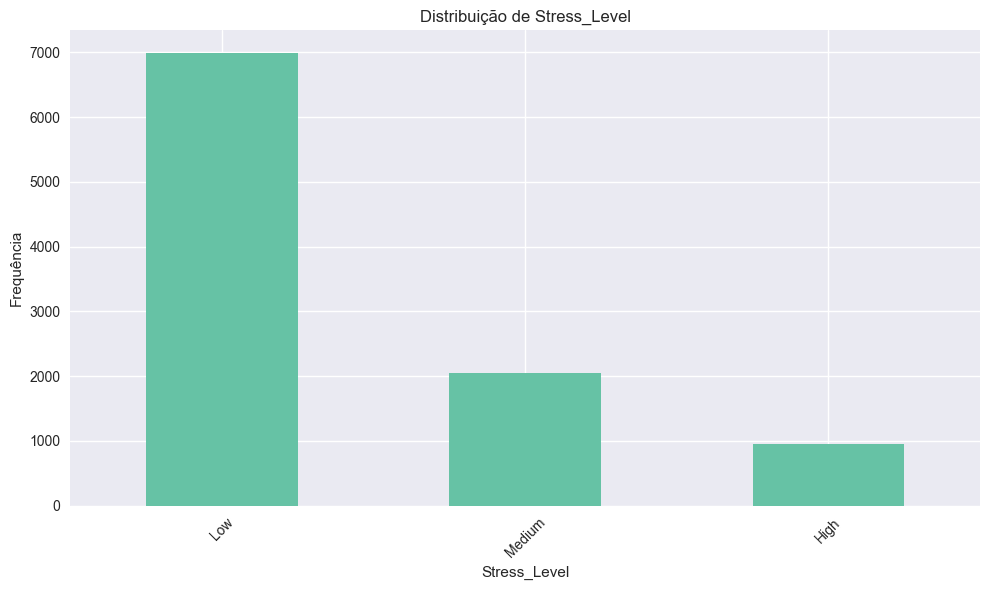

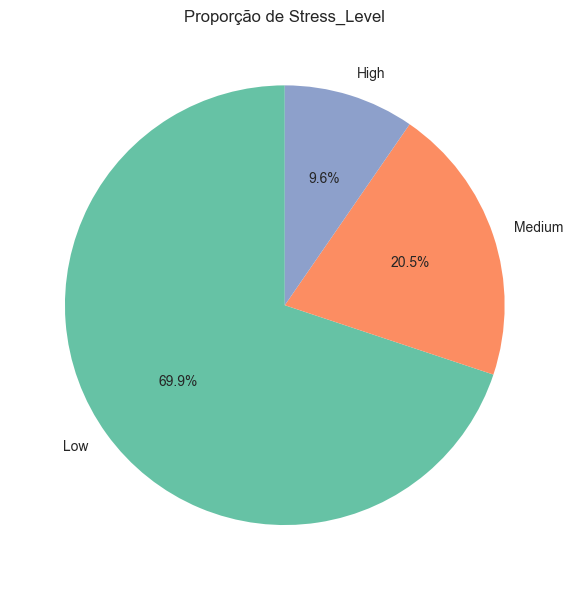

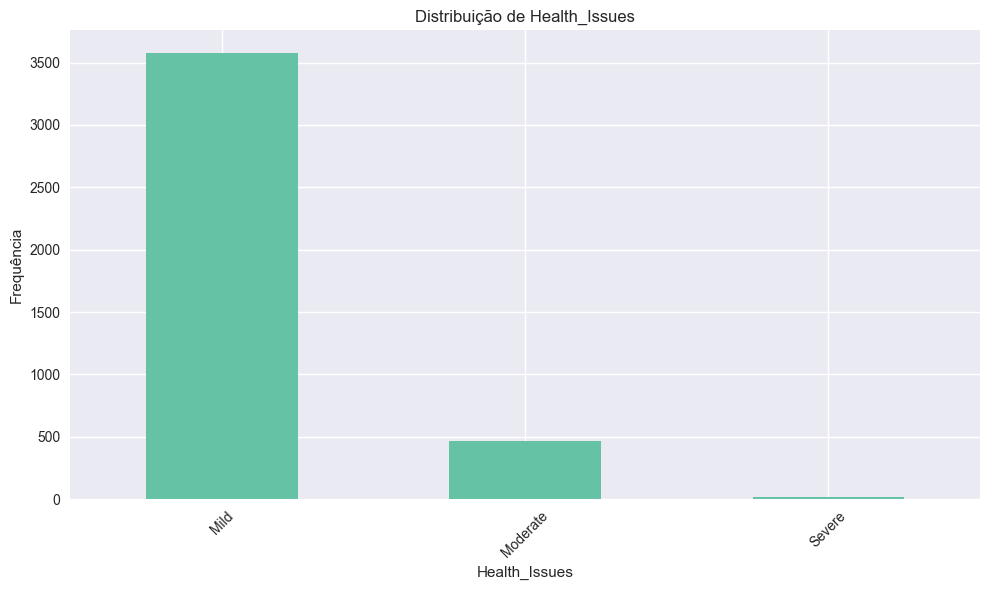

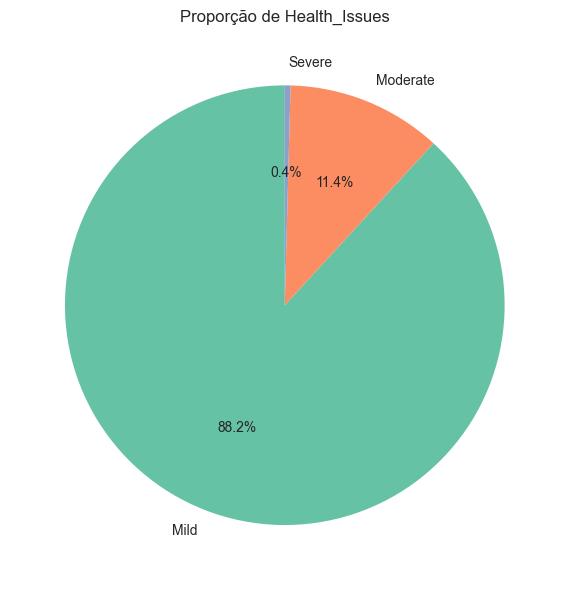

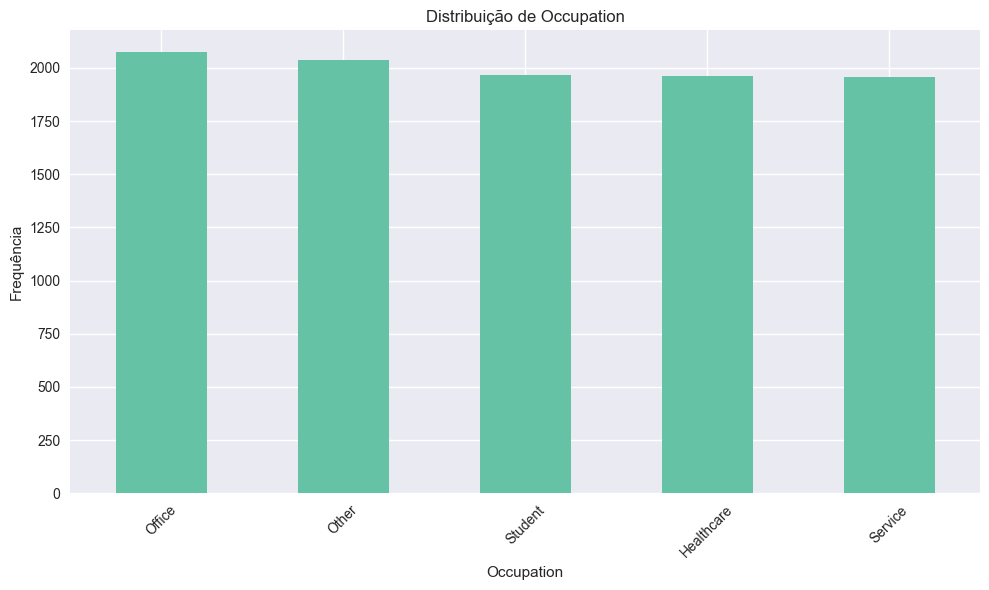

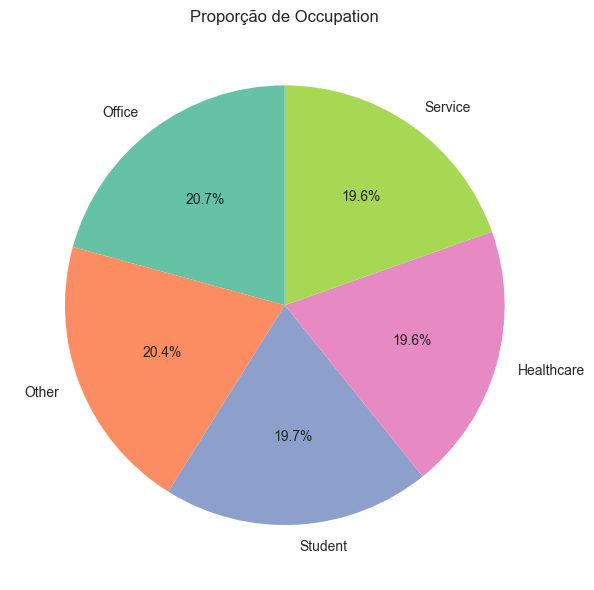

In [5]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    vc = df[col].value_counts()
    plt.figure()
    vc.plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col); plt.ylabel('Frequência'); plt.xticks(rotation=45)
    plt.tight_layout(); plt.show()
    if df[col].nunique() <= 6:
        plt.figure()
        vc.plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Proporção de {col}')
        plt.ylabel('')
        plt.tight_layout(); plt.show()


### 3.3 Matriz de Correlação (Numéricas)

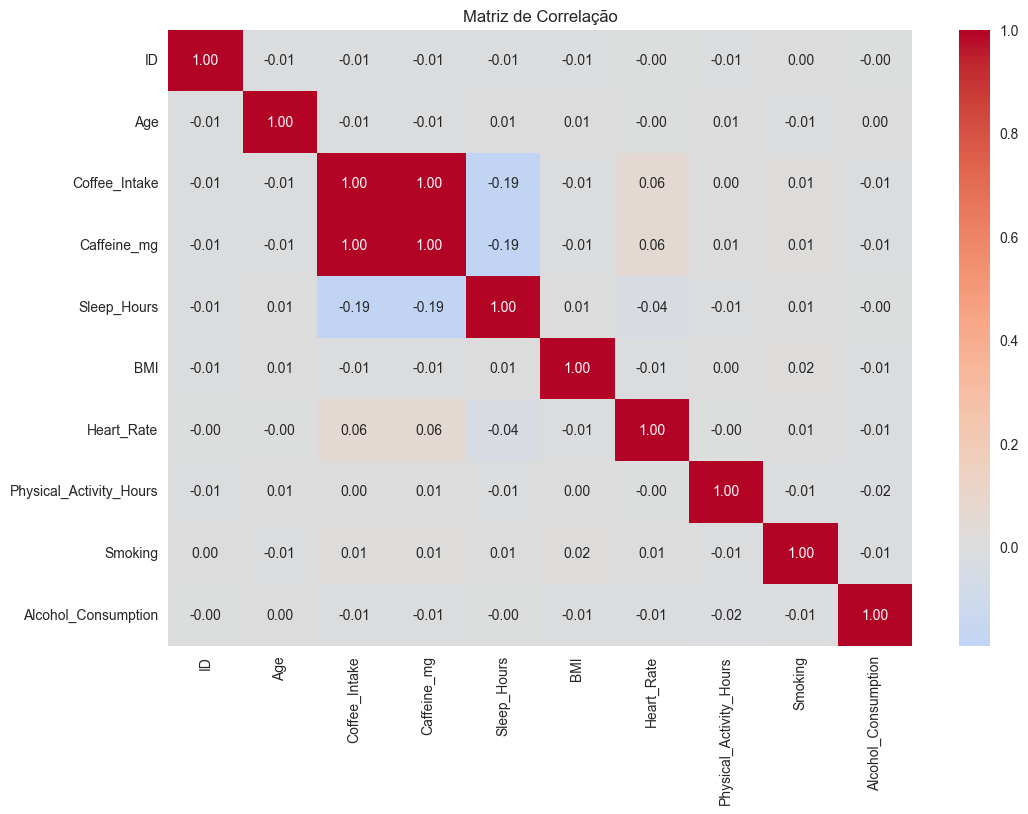

In [7]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0
)
plt.title('Matriz de Correlação')
plt.show()


## 4. Visualizações Comparativas e Segmentação

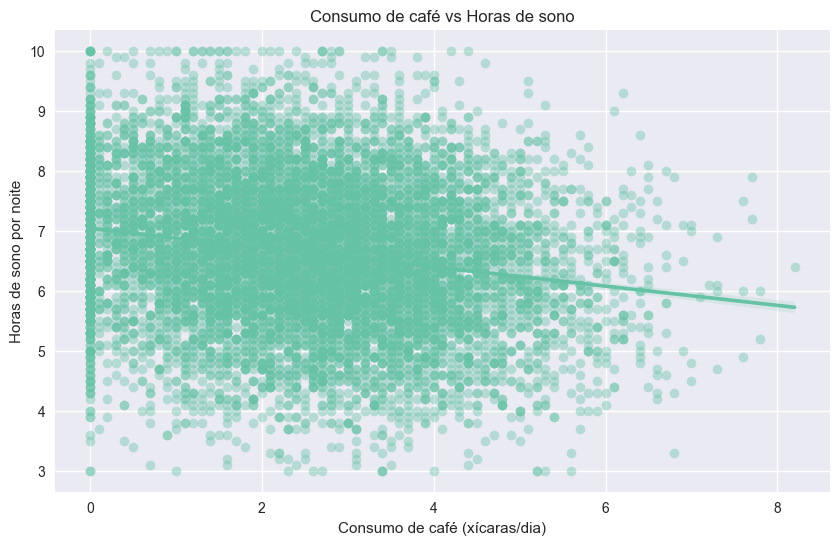

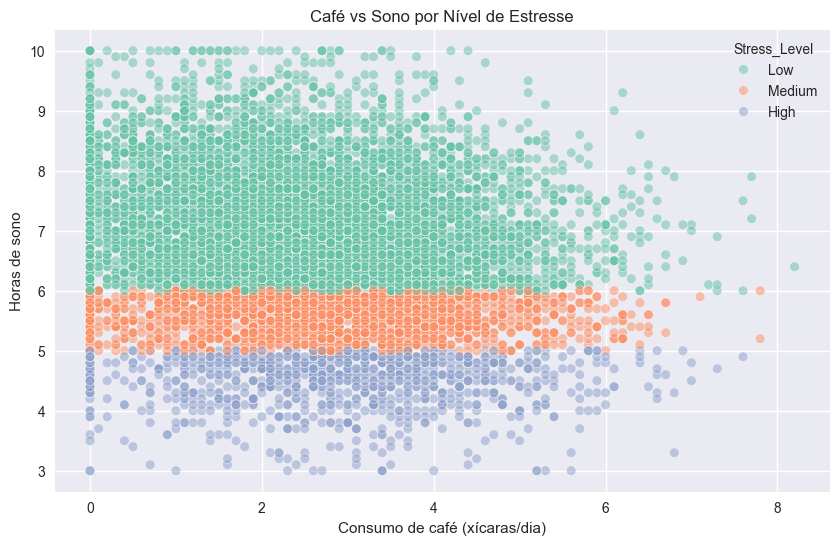

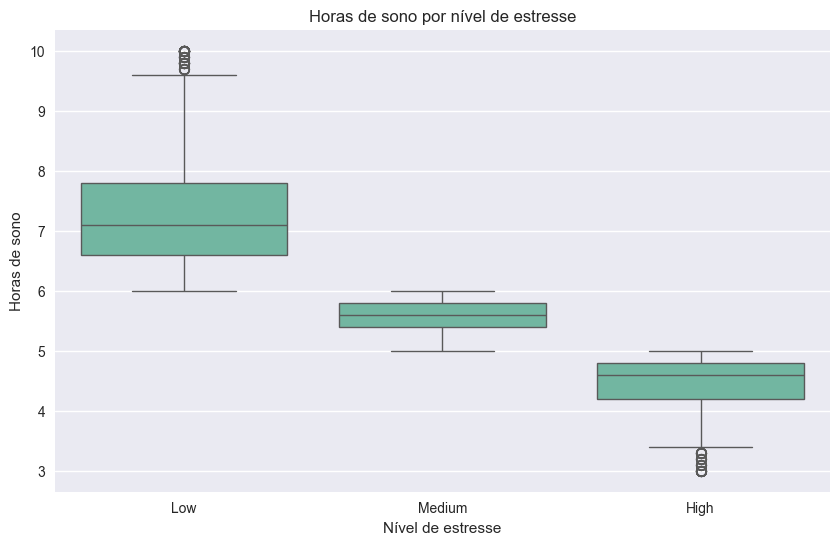

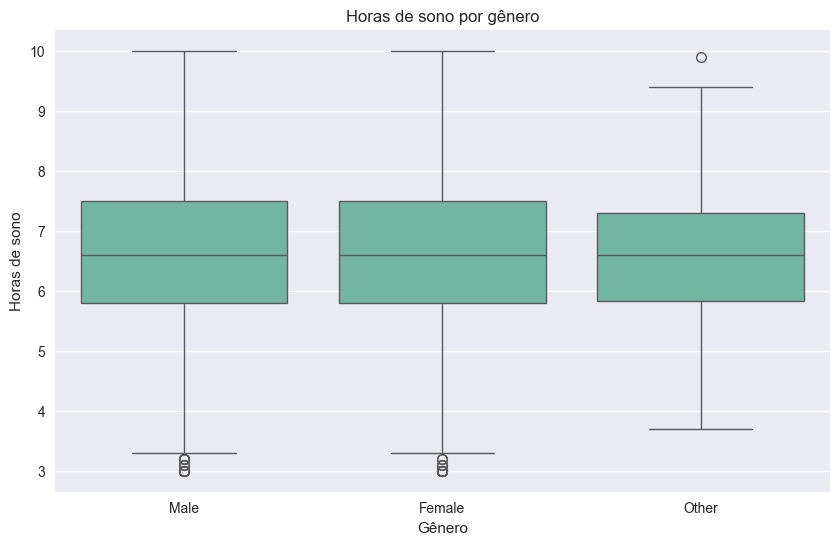

In [8]:
# Dispersão: Café vs Sono (com linha de tendência)
sns.regplot(data=df, x='Coffee_Intake', y='Sleep_Hours', scatter_kws={'alpha':0.4})
plt.title('Consumo de café vs Horas de sono')
plt.xlabel('Consumo de café (xícaras/dia)'); plt.ylabel('Horas de sono por noite')
plt.show()

# Dispersão colorida por Nível de Estresse
sns.scatterplot(data=df, x='Coffee_Intake', y='Sleep_Hours', hue='Stress_Level', alpha=0.5)
plt.title('Café vs Sono por Nível de Estresse')
plt.xlabel('Consumo de café (xícaras/dia)'); plt.ylabel('Horas de sono')
plt.show()

# Boxplots por Estresse e por Gênero
sns.boxplot(data=df, x='Stress_Level', y='Sleep_Hours')
plt.title('Horas de sono por nível de estresse')
plt.xlabel('Nível de estresse'); plt.ylabel('Horas de sono')
plt.show()

sns.boxplot(data=df, x='Gender', y='Sleep_Hours')
plt.title('Horas de sono por gênero')
plt.xlabel('Gênero'); plt.ylabel('Horas de sono')
plt.show()


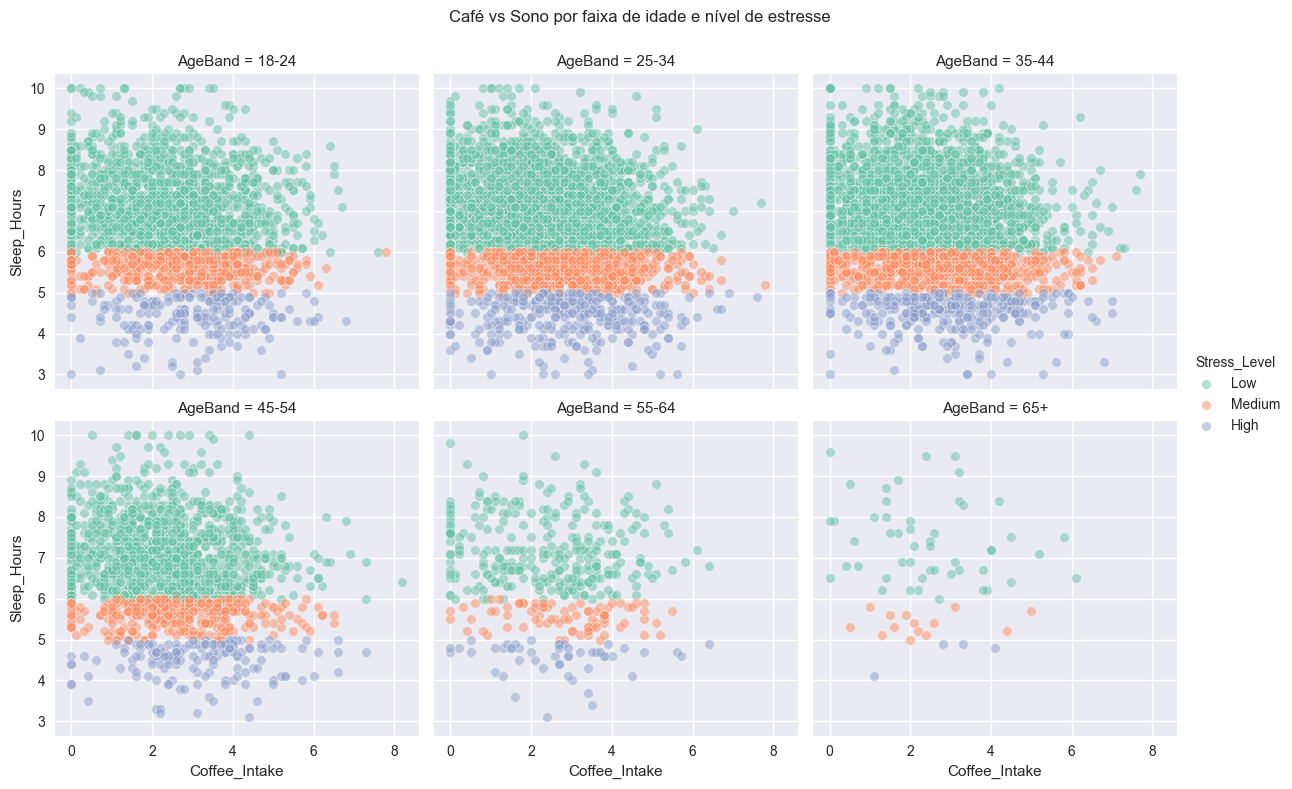

In [9]:
# Facet: Idade × Estresse × Café
bins = [0, 24, 34, 44, 54, 64, 120]
labels = ['18-24','25-34','35-44','45-54','55-64','65+']
df['AgeBand'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

g = sns.FacetGrid(df, col='AgeBand', hue='Stress_Level', col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x='Coffee_Intake', y='Sleep_Hours', alpha=0.5)
g.add_legend(); g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Café vs Sono por faixa de idade e nível de estresse')
plt.show()


## 5. Principais Descobertas


- **Cafeína reduz sono**: quartis mostram que o grupo de alta cafeína dorme ~0,6h a menos.
- **Estresse tem efeito forte**: sono médio cai de ~7,2h (baixo) para ~4,5h (alto).
- **Gênero**: diferenças pequenas na média de sono.
- **Idade × Estresse**: em faixas jovens, estresse médio/alto associa-se a menos horas de sono para níveis similares de café.


## 6. Modelagem Preditiva – Target: Sleep_Quality

In [10]:
# Alvo
y = df['Sleep_Quality']

# Remover colunas irrelevantes
X = df.drop(columns=['Sleep_Quality', 'ID'])

# Features derivadas
X['Caffeine_per_Cup'] = X['Caffeine_mg'] / X['Coffee_Intake'].replace(0, np.nan)
X['Caffeine_per_Cup'] = X['Caffeine_per_Cup'].fillna(0)
# Segunda feature derivada: atividade normalizada pelo BMI
X['Activity_per_BMI'] = (X['Physical_Activity_Hours'] / X['BMI']).replace([np.inf, -np.inf], 0).fillna(0)


### 6.1 Split Treino/Teste (estratificado)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Selecione colunas corretamente por tipo
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=[np.number]).columns

# Opcional (debug): verifique as seleções
print('Num cols:', list(num_cols))
print('Cat cols:', list(cat_cols))

# Pré-processamento com OneHot para categóricas e StandardScaler para numéricas
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'  # ou 'passthrough' se quiser manter colunas não tratadas
)


Num cols: ['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours', 'Smoking', 'Alcohol_Consumption', 'Caffeine_per_Cup', 'Activity_per_BMI']
Cat cols: ['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation', 'AgeBand']


### 6.2 Modelos: Regressão Logística e Random Forest

In [14]:
logit = Pipeline([('prep', preprocess), ('model', LogisticRegression(max_iter=500))])
rf    = Pipeline([('prep', preprocess), ('model', RandomForestClassifier(n_estimators=300, random_state=42))])

logit.fit(X_train, y_train)
rf.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI',
       'Heart_Rate', 'Physical_Activity_Hours', 'Smoking',
       'Alcohol_Consumption', 'Caffeine_per_Cup', 'Activity_per_BMI'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Country', 'Stress_Level', 'Health_Issues', 'Occupation',
       'AgeBand'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

### 6.3 Avaliação – Acurácia, Relatório e Matriz de Confusão


=== Logistic Regression ===
Acurácia (treino): 0.994
Acurácia (teste):  0.990

Classification Report (teste):
              precision    recall  f1-score   support

   Excellent       0.97      0.96      0.96       270
        Good       0.99      0.99      0.99      1128
        Fair       1.00      1.00      1.00       410
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



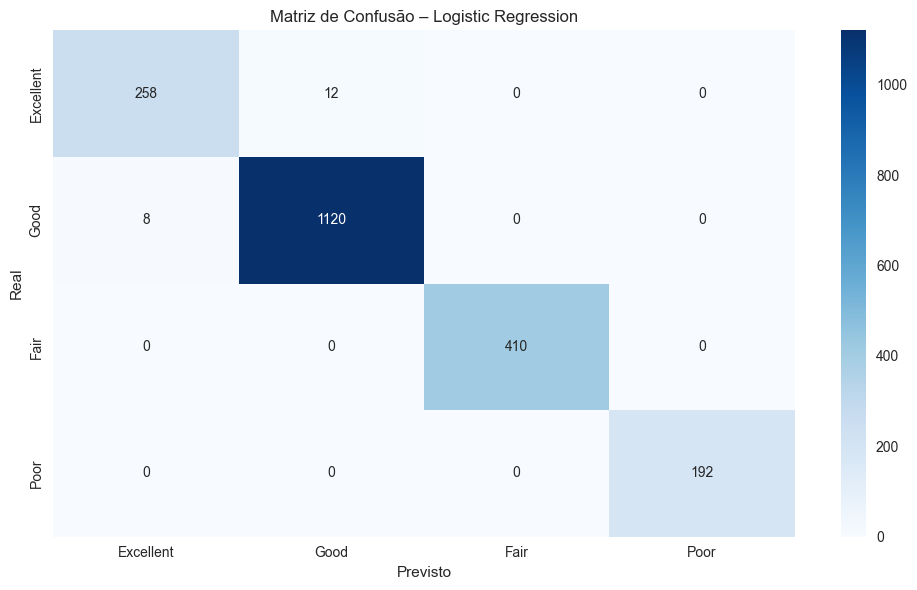


=== Random Forest ===
Acurácia (treino): 1.000
Acurácia (teste):  0.990

Classification Report (teste):
              precision    recall  f1-score   support

   Excellent       0.98      0.94      0.96       270
        Good       0.99      1.00      0.99      1128
        Fair       1.00      1.00      1.00       410
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



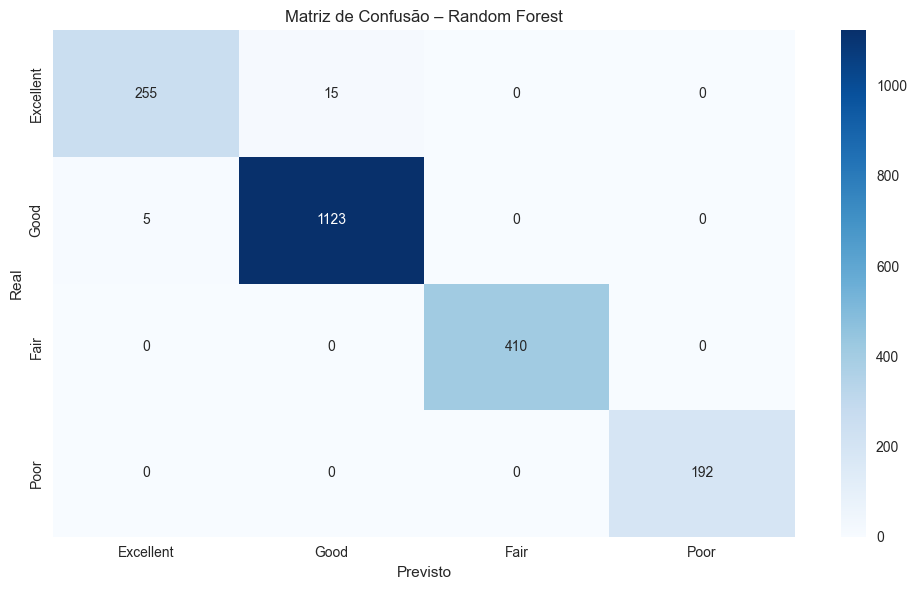


Melhor modelo: Logistic Regression


In [16]:
models = {
    'Logistic Regression': logit,
    'Random Forest': rf
}

results = {}

# Defina explicitamente a ordem de labels (alinha os relatórios e a matriz de confusão)
labels = ['Excellent', 'Good', 'Fair', 'Poor']
# Se preferir detectar automaticamente: labels = sorted(y.unique())

for name, model in models.items():
    # Previsões
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Acurácia
    acc_test  = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)

    # Cabeçalho e métricas
    print(f"\n=== {name} ===")
    print(f"Acurácia (treino): {acc_train:.3f}")
    print(f"Acurácia (teste):  {acc_test:.3f}")

    # Classification Report (garante mesma ordem de classes)
    print("\nClassification Report (teste):")
    print(classification_report(
        y_test, y_pred_test,
        labels=labels,
        target_names=labels
    ))

    # Matriz de confusão (mesma ordem de labels)
    cm = confusion_matrix(y_test, y_pred_test, labels=labels)
    results[name] = {'acc_train': acc_train, 'acc_test': acc_test, 'cm': cm}

    # Heatmap da matriz
    fig, ax = plt.subplots()
    sns.heatmap(cm, ax=ax, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    ax.set_title(f"Matriz de Confusão – {name}")
    ax.set_xlabel('Previsto'); ax.set_ylabel('Real')
    plt.tight_layout()
    plt.show()

# Seleção do melhor por acurácia de teste
best_name = max(results, key=lambda k: results[k]['acc_test'])
print(f"\nMelhor modelo: {best_name}")


### 6.4 Salvamentos – Dataset Processado e Modelo Campeão

In [17]:
# Salvar dataset final processado
df_processed = X.copy()
df_processed['Sleep_Quality'] = y
df_processed.to_csv('dataset_processado.csv', index=False)

# Salvar melhor modelo
best_model = rf if best_name == 'Random Forest' else logit
joblib.dump(best_model, 'best_sleep_quality_model.pkl')
print('Arquivos salvos: dataset_processado.csv, best_sleep_quality_model.pkl')


Arquivos salvos: dataset_processado.csv, best_sleep_quality_model.pkl


## 7. Recomendações para o Negócio (ligadas aos resultados)


- **Reduzir cafeína no período noturno**: grupos com alta cafeína têm ~0,6h a menos de sono médio.
- **Gestão de estresse**: queda marcada no sono de baixo para alto estresse; priorizar programas de bem-estar para esses clientes.
- **Comunicação segmentada**: usar os cortes por faixa etária e nível de estresse para campanhas personalizadas.
- **Uso do modelo**: alimentar jornadas de alerta e conteúdo educativo, indicando metas de redução de café e higiene do sono.
- **Monitoramento contínuo**: acompanhar métricas (acurácia e matriz de confusão) e refinar o pipeline com novos dados.
